<a href="https://colab.research.google.com/github/ananyaa06/FutureMakers2022/blob/main/Day_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

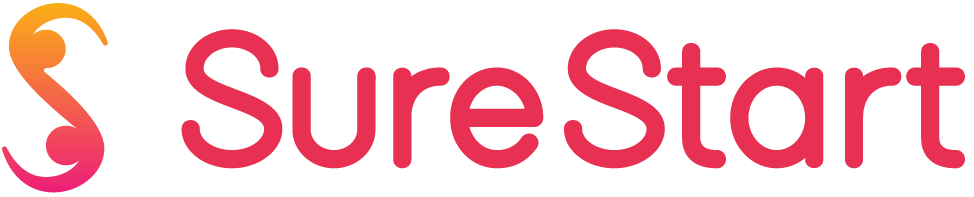

#Day 10 Objectives:
* To introduce you to activation functions. 



#Introduction to Activation Functions

Activation functions are used to determine the firing (activation) of neurons in a neural network. Given a linear combination of inputs and weights from the previous layer, the activation function controls how we'll pass that information on to the next layer.

An ideal activation function is both nonlinear and differentiable. The nonlinear behavior of an activation function allows our neural network to learn nonlinear relationships in the data. Differentiability is important because it allows us to backpropagate the model's error when training to optimize the weights.

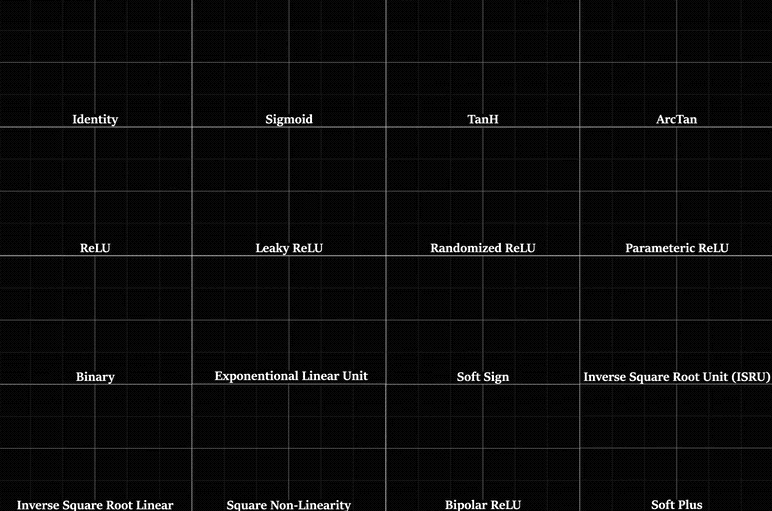

Source: https://mlfromscratch.com/activation-functions-explained/#/


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

In [2]:
cifar_100 = tf.keras.datasets.cifar100
(training_images, training_labels), (test_images, test_labels) = cifar_100.load_data(label_mode="coarse")
training_images=training_images.reshape(50000, 32, 32, 3)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

169017344/169001437 [==============================] - 3s 0us/step


##Sigmoid

The sigmoid function is also called a **squashing function** as its domain is the set of all real numbers, and its range is $(0, 1)$. Hence, if the input to the function is either a very large negative number or a very large positive number,  the output is always between 0 and 1. Same goes for any number between $-\infty$ and $+\infty$.

The sigmoid function is used as an activation function in neural networks. A weighted sum of inputs is passed through an activation function and this output serves as an input to the next layer. 

When the activation function for a neuron is a sigmoid function it is a guarantee that the output of this unit will always be between 0 and 1. Also, as the sigmoid is a non-linear function, the output of this unit would be a non-linear function of the weighted sum of inputs. Such a neuron that employs a sigmoid function as an activation function is termed as a sigmoid unit.

$$Sigmoid(x) = \frac{1}{1 + e^{-x}}$$

## Question 1

We have just mathematically defined Sigmoid, now you have to code it.

### Answer 1

In [5]:
def sigmoid(x):
    y = 1/ (1+math.exp(-x))
    return y

## TanH

The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function and even has the same S-shape.

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.

When using the TanH function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range -1 to 1 (e.g. the range of the activation function) prior to training.

$$TanH(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

## Question 2

We have just mathematically defined TanH, now you have to code it.

### Answer 2

In [6]:
def tanh(x):
    y = (math.exp(x)-math.exp(-x))/(math.exp(x)+ math.exp(-x))
    return y

## Rectified Linear Unit [ReLU]

Traditionally, some prevalent non-linear activation functions, like sigmoid functions (or logistic) and hyperbolic tangent [we will talk about these in later sections], are used in neural networks to get activation values corresponding to each neuron. 

Recently, the ReLU function has been used instead to calculate the activation values in traditional neural network or deep neural network paradigms. The reasons of replacing sigmoid and hyperbolic tangent with ReLU consist of:

* **Computation saving** - the ReLU function is able to accelerate the training speed of deep neural networks compared to traditional activation functions since the derivative of ReLU is 1 for a positive input. Due to a constant, deep neural networks do not need to take additional time for computing error terms during training phase.

* **Solving the vanishing gradient problem** [we will also talk about this in later section]: The ReLU function does not trigger the vanishing gradient problem when the number of layers grows. This is because this function does not have an asymptotic upper and lower bound. Thus, the earliest layer (the first hidden layer) is able to receive the errors coming from the last layers to adjust all weights between layers. By contrast, a traditional activation function like sigmoid is restricted between 0 and 1, so the errors become small for the first hidden layer. This scenario will lead to a poorly trained neural network.

$$ReLU(x) = \begin{cases}
x &x > 0\\ 
0 &x <= 0
\end{cases}$$

## Question 3

We have just mathematically defined ReLU, now you have to code it.

### Answer 3

In [7]:
def relu(x):
    y = max(x, 0)
    return y

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3)),
  tf.keras.layers.ReLU(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.ReLU(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Dense(20, activation='softmax')
  
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 re_lu (ReLU)                (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9

# Visualizing how ReLU affects the feature maps

Quoting François Chollet in his book "DEEP LEARNING with Python" :

Intermediate activations are "*useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.*"

"*The representations learned by convnets are highly amenable to visualization, in large part because they're representations of visual concepts. Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its **activation**, the output of the activation function). This gives a view into how an input is decomposed into the different filters learned by the network. Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.*"


---


Next, we’ll get an input image, not part of the images the network was trained on.

In order to extract the feature maps we want to look at, we’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, we’ll use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting class is a Keras model, just like the Sequential models, mapping the specified inputs to the specified outputs. What sets the Model class apart is that it allows for models with multiple outputs, unlike Sequential.

In [9]:
img = test_images[0:30,:,:,:]

In [10]:
# Storing outputs from each layer of the model
layer_outputs = [layer.output for layer in model.layers[0:9]]

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Getting activations (predictions) of a test image
activations  =  activation_model.predict(img)

In [11]:
def visualize_activation(model,activations,activation_model):
  layer_names = []
  for layer in model.layers[0:9]:
      layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
      
  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations):       # Displays the feature maps
      n_features = layer_activation.shape[-1]                              # Number of features in the feature map
      size = layer_activation.shape[1]                                     # The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row                                # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols):                                            # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[0, :, :, col * images_per_row + row]
              channel_image -= channel_image.mean()                        # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


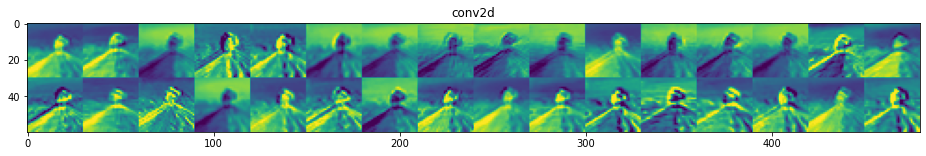

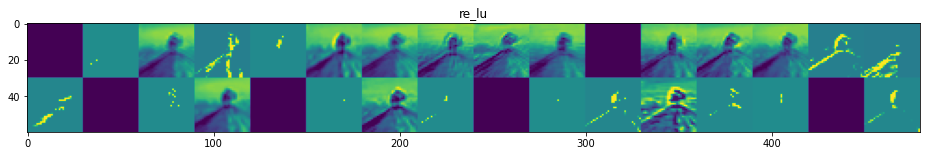

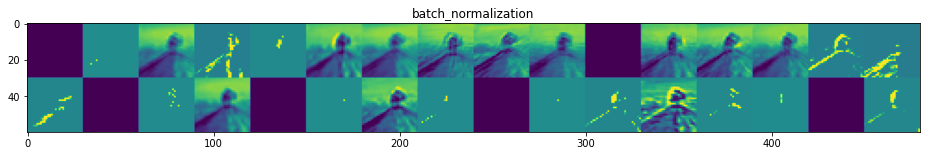

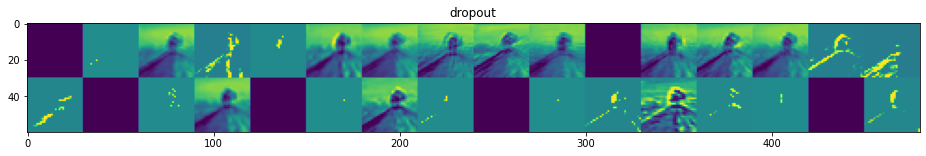

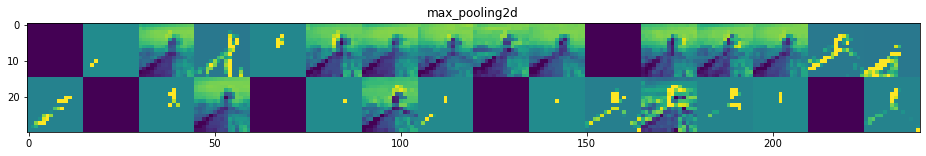

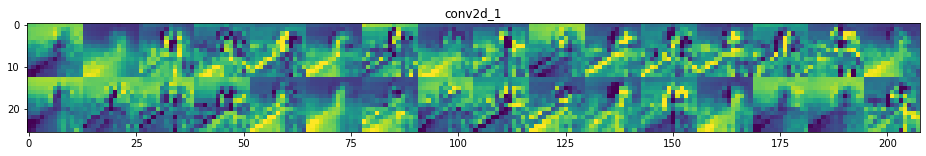

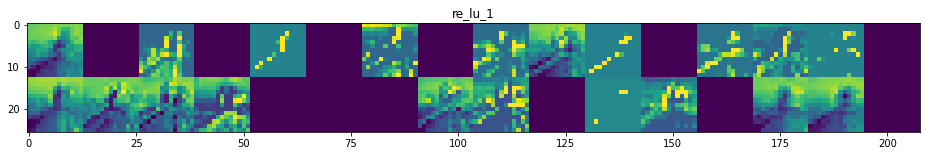

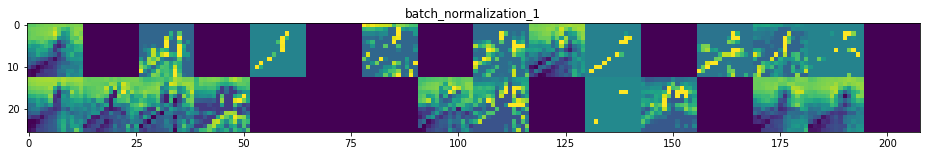

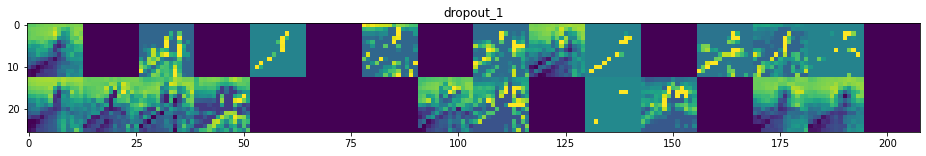

In [12]:
visualize_activation(model,activations,activation_model)

## Question 4

Explain why there are empty spaces in the above visualization.

## Answer
Not all of the neurons recieve inputs or outputs because the weights have been rendered useless.

## Question 5

Why the feature maps are more pixelated after max-pooling?

##Answer
While max-pooling reduces the dimensionality of the dataset, it also accentuates the differences by taking the highest value of each set of pixels.

#Vanishing Gradients
If you do not carefully choose the range of the initial values for the weights, and if you do not control the range of the values of the weights during training, vanishing gradient would occur which is the main barrier to learning deep networks.

The reason for vanishing gradient is that during backpropagation, the gradient of early layers (layers near to the input layer) are obtained by multiplying the gradients of later layers (layers near to the output layer). So, for example if the gradients of later layers are less than one, their multiplication vanishes very fast.

Considering this we can say:
* Gradient is the gradient of the loss with respect to each trainable parameters (weights and biases).
* Vanishing gradient does not mean the gradient vector is all zero (except for numerical underflow), but it means the gradients are so small that the learning will be very slow.

When you use sigmoid activation function which squashes the input to a small range (0,1), you further multiply it by a small learning rate and more partial derivatives (chain rule) as you go back in layers. The value of gradient to be updated diminishes and thus earlier layers get little or no updates. If little, then it would require lot of training. If no, then only changing the activation function (AF) would be of any help. ReLUs are currently the best AFs that avoid this problem.

Source: https://stats.stackexchange.com/questions/301285/what-is-vanishing-gradient

#Exploding Gradients
Considering what we talked about in "Vanishing Gradients", in a network of $n$ hidden layers, $n$ derivatives will be multiplied together. If the derivatives are large then the gradient will increase exponentially as we propagate down the model until they eventually explode, and this is what we call the problem of exploding gradient. 


#Fun Resource
https://imgflip.com/ai-meme

AI Meme Generator. 

# Dying ReLU problem and how we solved it

A "dead" ReLU always outputs the same value (zero as it happens, but that is not important) for any input. Probably this is arrived at by learning a large negative bias term for its weights.

In turn, that means that it takes no role in discriminating between inputs. For classification, you could visualise this as a decision plane outside of all possible input data.

Once a ReLU ends up in this state, it is unlikely to recover, because the function gradient at 0 is also 0, so gradient descent learning will not alter the weights. "Leaky" ReLUs with a small positive gradient for negative inputs (y=0.01x when x < 0 say) are one attempt to address this issue and give a chance to recover.

The sigmoid and tanh neurons can suffer from similar problems as their values saturate, but there is always at least a small gradient allowing them to recover in the long term.

Things to note:

* Dying ReLU doesn't mean that neuron's output will remain zero at the test time as well. Depending on distribution differences this may or may not be the case.
* Dying ReLU is not permanent dead. If you add new training data or use pre-trained model for new training, these neurons might kick back!
* Technically Dying ReLU doesn't have to output 0 for ALL training data. It may happen that it does output non-zero for some data but number of epochs are not enough to move weights significantly.

##Leaky-ReLU

The first concern most people raise when seeing the ReLU function for the first time is: is the negative part really being thrown away? Yes, it is. Puzzled by it, researchers proposed the LeakyReLU. Instead of throwing away the negative part, return a diminished version of it.

This way, the signal is not completely lost, but significantly diminished by a leak factor. In practice, this proved effective in some scenarios. Also, it alleviates the dead gradient problem, allowing at least some part of the signal to go through. Playing with the negative part is a recurring theme over the next activations.

$$Leaky\text{-}ReLU(x) = \begin{cases}
x &x > 0\\ 
α x &x <= 0
\end{cases}$$

$α$ is the gradient here.

## Question 6

We have just mathematically defined ReLU, now you have to code it.

### Answer 6

In [13]:
def leakyrelu(x):
    y = max(0.05*x, x)
    return y

## Issues with Leaky-ReLU

While Leaky-ReLU does contribute towards a better activation function, the function does not solve all the well-known issues.

In their paper “Fast and accurate deep network learning by exponential linear units”, Clevert et al. (2015) argue that it introduces new issues. While they are not too sensitive to the vanishing gradients problem and remove the dying ReLU problem from the equation, they have no such thing as a “noise-rebust deactivation state” (Clevert et al, 2015).

For positive inputs, the Leaky ReLU activation function displayed behaves like traditional ReLU. For negative inputs, the outputs are small but nonzero. So far, so good.

But what happens if, for example, we input -5,000,000? While this does not happen quite often – we hope – the input would still be very negative.

The risk of this happening increases when the Leaky ReLU α is increased (steepening the curve).

Any noise will interfere with training, and this is a new problem introduced by Leaky ReLU.


## Exponential Linear Unit [ELU]

For the above issues with leaky-ReLU, a new activation function was proposed, called the Exponential Linear Unit (or ELU), which shares Leaky ReLU benefits yet improves them as well:

* ELU is not too sensitive to vanishing gradients and removes the dying ReLU problem.
* Mean ELU activations are closer to zero, which is estimated to make the learning process faster – a fact shared by PReLU and Leaky ReLU.
* ELU saturates to a fixed negative value with decreasing input, making it relatively robust to noise.

Do note that, $\alpha > 0$ (gradient) must hold for ELU to work. This must be the case since $\alpha$ represents the absolute value of the negative saturation level; by definition of the formula above this must be larger than zero.

$$ELU(x) = \begin{cases}
x &x > 0\\ 
\alpha \cdot (e^x-1) &x <= 0
\end{cases}$$

## Question 7

We have just mathematically defined ReLU, now you have to code it.

### Answer 7

In [14]:
def elu(x):
    y = max(x, 0.05*(math.exp(x)-1))
    return y

# For the curious ones: Advanced Activation Functions 

##Swish
Simply put, Swish is an extension of the Sigmoid activation function which was proposed in the paper "Sigmoid-Weighted Linear Units for Neural Network Function Approximation in Reinforcement Learning". 

The slight modification made in the Swish formulation is the addition of a trainable β parameter, making it $f(x)=x∗sigmoid(βx)$.

It has a few key distinct properties that make it different and better than ReLU:
1. Swish is a smooth continuous function, unlike ReLU which is a piecewise linear function.
2. Swish allows a small number of negative weights to be propagated through, while ReLU thresholds all negative weights to zero. 

This is an extremely important property and is crucial in the success of non-monotonic smooth activation functions, like that of Swish, when used in increasingly deep neural networks.
3. Lastly, the trainable parameter allows to better tune the activation function to maximize information propagation and push for smoother gradients, which makes the landscape easier to optimize, thus generalizing better and faster. 

Swish is also a self-gating activation function since it modulates the input by using it as a gate to multiply with the sigmoid of itself, a concept first introduced in Long Short-Term Memory (LSTMs).



##GeLU

The Gaussian Error Linear Unit, or GELU, was proposed in a 2016 paper by Hendrycks & Gimpel. The function simply multiplies its input with the normal distribution’s cumulative density function at this input. Since this calculation is quite slow, a much faster approximation is often used in practice that only differs in the fourth decimal place.

In contrast to the ReLU family of activations, GELU weights its inputs by their value instead of thresholding them by their sign. The authors have evaluated the GELU activation against the ReLU and ELU functions and found performance improvements across all considered computer vision, natural language processing, and speech tasks.


##SeLU

The Scaled ELU or SELU activation was introduced in a 2017 paper by Klambauer et al. As the name suggests, it’s a scaled version of the ELU, with the two scaling constants in the formula below chosen such as in the TensorFlow and Pytorch implementations.

The SELU function has a peculiar property. The authors of the paper showed that if properly initialized, dense feed-forward networks will self-normalize provided all hidden layers are SELU-activated. This means that each layer’s output will roughly have the mean equal to zero and the standard deviation equal to one, which helps prevent the vanishing or exploding gradients problems and allows for building deep networks. The paper evaluated such self-normalizing networks on over 120 tasks from the UCI machine learning repository, drug discovery benchmarks, and even astronomy tasks to find that they significantly outperform traditional feed-forward networks.

#How to choose the right Activation Function?
You need to match your activation function for your output layer based on the type of prediction problem that you are solving—specifically, the type of predicted variable.

Here’s what you should keep in mind:

As a rule of thumb, you can begin with using the ReLU activation function and then move over to other activation functions if ReLU doesn’t provide optimum results.

And here are a few other guidelines to help you out.

* ReLU activation function should only be used in the hidden layers.
* Sigmoid/Logistic and Tanh functions should not be used in hidden layers as they make the model more susceptible to problems during training (due to vanishing gradients).
* Swish function is used in neural networks having a depth greater than 40 layers.

Finally, a few rules for choosing the initial activation function for your output layer based on the type of prediction problem that you are solving:

* Regression - Linear Activation Function
* Binary Classification - Sigmoid/Logistic Activation Function
* Multiclass Classification - Softmax
* Multilabel Classification - Sigmoid
* The activation function used in hidden layers is typically chosen based on the type of neural network architecture.


## Question 8

From the plot below, identify all the activation functions:    

1. Purple line: ELU   
2. Green line: TanH
3. Yellow line: Sigmoid        
4. Blue line: ReLu   
5. Red line: Leaky ReLu

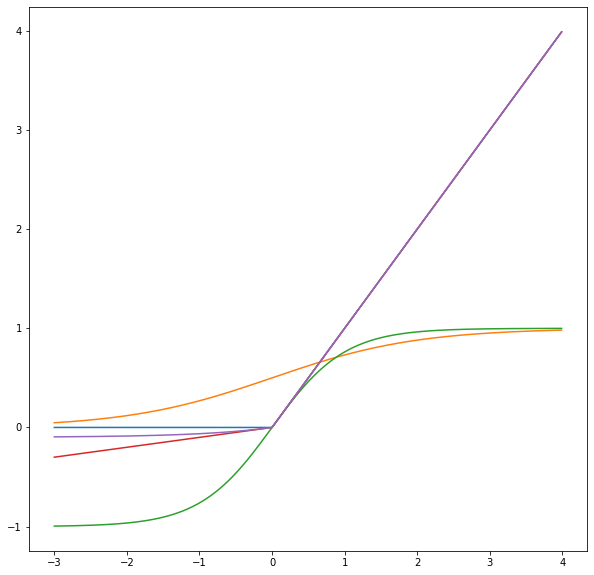

# Experiment Section to visualize other activation functions

You may exchange the activation functions with others we have talked about such as:

* tf.keras.layers.LeakyReLU
* tf.keras.activations.swish
* tf.keras.activations.gelu
* tf.keras.activations.selu

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(32, 32, 3)),
  tf.keras.layers.ELU(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.ELU(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128),
  tf.keras.layers.ELU(),
  tf.keras.layers.Dense(20, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
img = test_images[0:30,:,:,:]

In [ ]:
layer_outputs = [layer.output for layer in model.layers[0:9]]

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

activations  =  activation_model.predict(img)


In [ ]:
visualize_activation(model,activations,activation_model)

In [ ]:
# TO BE REMOVED IN STUDENT'S COPY

inputs = np.arange(-3,4,0.01)

relu_op = []
for i in inputs:
    relu_op.append(relu(i))
print(relu_op)

sigmoid_op = []
for i in inputs:
    sigmoid_op.append(sigmoid(i))
print(sigmoid_op)

tanh_op = []
for i in inputs:
    tanh_op.append(tanh(i))
print(tanh_op)

leaky_relu_op = []
for i in inputs:
    leaky_relu_op.append(leakyrelu(i, 0.1))
print(leaky_relu_op)

elu_op = []
for i in inputs:
    elu_op.append(elu(i, 0.1))
print(elu_op)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(inputs, relu_op, label='rel')
plt.plot(inputs, sigmoid_op, label='sig')
plt.plot(inputs, tanh_op, label='tan')
plt.plot(inputs, leaky_relu_op, label='leaky')
plt.plot(inputs, elu_op, label='elu')
plt.legend()
plt.show()

# **Upload this Day 10 Colab Notebook to your Github repository under "Day 10" folder. Also add your *Reflection* on today's learning in README.md**

Source:
 
https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

https://www.v7labs.com/blog/neural-networks-activation-functions

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/